In [1]:
using ExprOptimization

INFO: Recompiling stale cache file C:\Users\rcnlee\.julia\lib\v0.6\ExprRules.ji for module ExprRules.
INFO: Recompiling stale cache file C:\Users\rcnlee\.julia\lib\v0.6\ExprOptimization.ji for module ExprOptimization.


In [2]:
ruleset = @ruleset begin
    Real = x
    Real = Real * Real
    Real = Real + Real
    Real = Real - Real
    Real = _(Base.rand(1.0:5.0))
end

ExprRules.RuleSet(Any[:x, :(Real * Real), :(Real + Real), :(Real - Real), :(_(Base.rand(1.0:5.0)))], Symbol[:Real, :Real, :Real, :Real, :Real], Bool[true, false, false, false, true], Bool[false, false, false, false, true], Dict(:Real=>[1, 2, 3, 4, 5]))

In [47]:
srand(0)
tree = rand(RuleNode, ruleset, :Real, 4)

ExprRules.RuleNode(3, Nullable{Any}(), ExprRules.RuleNode[ExprRules.RuleNode(5, 5.0, ExprRules.RuleNode[]), ExprRules.RuleNode(3, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[]), ExprRules.RuleNode(4, #NULL, ExprRules.RuleNode[ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[]), ExprRules.RuleNode(5, 3.0, ExprRules.RuleNode[])])])])

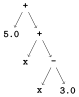

In [48]:
display(tree, ruleset)

In [33]:
ex = get_executable(tree, ruleset)

:((x - (x + 1.0)) + (x * 5.0 - (x - 2.0)))

In [6]:
ground_truth(x) = x + 2
function ExprOptimization.loss(tree::RuleNode)
    ex = get_executable(tree, ruleset)
    los = 0.0
    global x
    for x = -5.0:0.1:5.0
        los += abs2(eval(ex) - ground_truth(x))
    end
    los
end

In [9]:
trees = RuleNode[]
push!(trees, RuleNode(5, 0.0))
push!(trees, RuleNode(5, 2.0))
push!(trees, RuleNode(1))
push!(trees, RuleNode(3, [RuleNode(1), RuleNode(5, 2.0)]))

trees[3]

ExprRules.RuleNode(1, Nullable{Any}(), ExprRules.RuleNode[])

In [10]:
i = 0
for t in trees
    ex = get_executable(t, ruleset)
    @printf("%2d  %15s  %5f\n", i+=1, string(ex), loss(t))
end

 1              0.0  1262.500000
 2              2.0  858.500000
 3                x  404.000000
 4          x + 2.0  0.000000


In [45]:
srand(0)
p = MonteCarloParams(500, 4)
results = optimize(p, ruleset, :Real)

ExprOptimization.ExprOptResults(ExprRules.RuleNode(3, Nullable{Any}(), ExprRules.RuleNode[ExprRules.RuleNode(5, 2.0, ExprRules.RuleNode[]), ExprRules.RuleNode(1, #NULL, ExprRules.RuleNode[])]), 0.0, :(2.0 + x), nothing)

In [46]:
(results.expr, results.loss)

(:(2.0 + x), 0.0)